In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("hba1c.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,HBA1C,Alcohol,Cholestrol
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,59,No,132
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,60,No,79
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,65,Yes,71
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,43,Yes,77
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,38,No,66


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
 11  HBA1C              5110 non-null   int64  
 12  Alcohol            5110 non-null   object 
 13  Cholestrol         5110 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 559.0+ KB


In [5]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [6]:
df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)
df = pd.get_dummies(df, drop_first= True)

In [7]:
df.head()

,age,avg_glucose_level,bmi,HBA1C,Cholestrol,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1,Alcohol_Yes
0,67.0,228.69,36.600000,59,132,True,False,True,True,False,True,False,False,True,True,False,False,True,False
1,61.0,202.21,28.893237,60,79,False,False,False,True,False,False,True,False,False,False,True,False,True,False
2,80.0,105.92,32.500000,65,71,True,False,True,True,False,True,False,False,False,False,True,False,True,True
3,49.0,171.23,34.400000,43,77,False,False,False,True,False,True,False,False,True,False,False,True,True,True
4,79.0,174.12,24.000000,38,66,False,True,False,True,False,False,True,False,False,False,True,False,True,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   avg_glucose_level               5110 non-null   float64
 2   bmi                             5110 non-null   float64
 3   HBA1C                           5110 non-null   int64  
 4   Cholestrol                      5110 non-null   int64  
 5   gender_Male                     5110 non-null   bool   
 6   hypertension_1                  5110 non-null   bool   
 7   heart_disease_1                 5110 non-null   bool   
 8   ever_married_Yes                5110 non-null   bool   
 9   work_type_Never_worked          5110 non-null   bool   
 10  work_type_Private               5110 non-null   bool   
 11  work_type_Self-employed         5110 non-null   bool   
 12  work_type_children              51

In [9]:
#RANDOM OVERSAMPLING

In [10]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke_1'],axis=1)
y=df['stroke_1']
X_over, y_over = oversample.fit_resample(X, y)

In [11]:
#STANDARD SCALER

In [12]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
df[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(df[['bmi', 'avg_glucose_level', 'age']])

In [13]:
# TRAIN AND TEST SPLIT

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)

In [15]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (7777, 18)
y_train: (7777,)
X_test: (1945, 18)
y_test: (1945,)


In [16]:
# DESICION TREE

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(max_depth=8)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8786632390745501


In [18]:
print('Training Accuracy:', accuracy_score(y_train, y_pred_train))
print('Testing Accuracy:', accuracy_score(y_test, y_pred))

Training Accuracy: 0.9040761218979041
Testing Accuracy: 0.8786632390745501


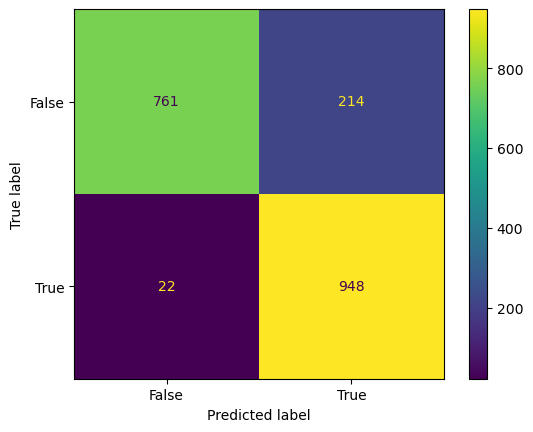

Precision: 0.8158347676419966
Recall: 0.977319587628866
F1 Score: 0.8893058161350844


In [19]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

In [20]:
#RANDOM FOREST

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
rf_clf = RandomForestClassifier(n_estimators = 10,max_depth=9)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
y_pred_train = rf_clf.predict(X_train)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.9012853470437018


In [22]:
print('Training Accuracy:', accuracy_score(y_train, y_pred_train))
print('Testing Accuracy:', accuracy_score(y_test, y_pred_rf))

Training Accuracy: 0.9186061463289186
Testing Accuracy: 0.9012853470437018


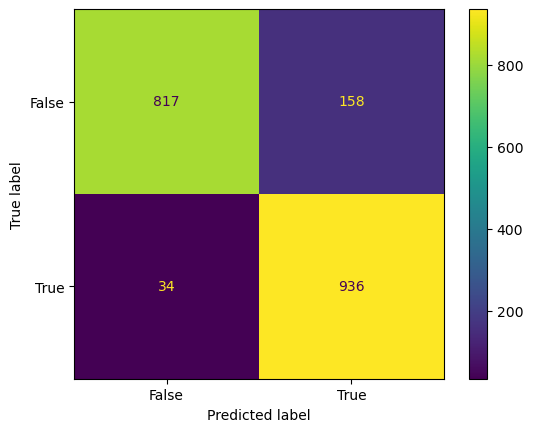

Precision: 0.8555758683729433
Recall: 0.9649484536082474
F1 Score: 0.9069767441860465


In [23]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_rf, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()

precision = precision_score(y_test, y_pred_rf)
print("Precision:", precision)

recall = recall_score(y_test, y_pred_rf)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_rf)
print("F1 Score:", f1)

In [24]:
#KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

confusion_matrix(y_test, y_pred_knn)
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))

Accuracy: 0.8745501285347044
ROC AUC Score: 0.9665968807824478


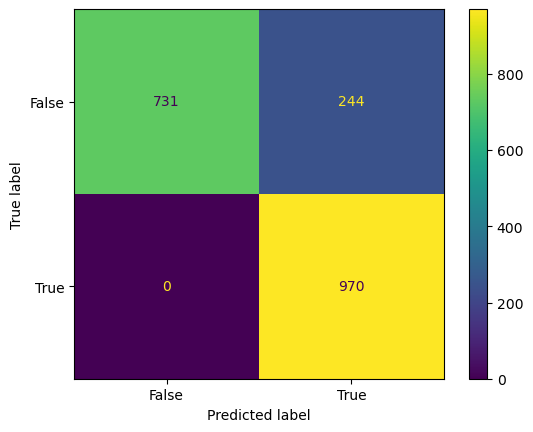

ROC AUC Score: 0.9665968807824478
Precision: 0.7990115321252059
Recall: 1.0
F1 Score: 0.8882783882783883


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

cm = confusion_matrix(y_test, y_pred_knn, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()
roc_auc = roc_auc_score(y_test, y_pred_prob_knn)
print('ROC AUC Score:', roc_auc)

precision = precision_score(y_test, y_pred_knn)
print("Precision:", precision)

recall = recall_score(y_test, y_pred_knn)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_knn)
print("F1 Score:", f1)

In [27]:
#TESTING

In [28]:
age=67
avg_glucose_level=228
bmi=36.6
HBA1C=59
Cholestrol=132
gender_Male=1
ever_married_Yes=0	
work_type_Never_worked=0	
work_type_Private=1	
work_type_Self_employed=0
work_type_children=0	
Residence_type_Urban=1
smoking_status_formerly_smoked=1
smoking_status_never_smoked=0
smoking_status_smokes=0
hypertension_1=0
heart_disease_1=1
Alcohol_Yes=1
input_features = [age	,avg_glucose_level,	bmi	,HBA1C,Cholestrol,gender_Male,hypertension_1,	heart_disease_1,ever_married_Yes,	work_type_Never_worked,	work_type_Private,	work_type_Self_employed,	work_type_children	,Residence_type_Urban,	smoking_status_formerly_smoked,smoking_status_never_smoked	,smoking_status_smokes,Alcohol_Yes]

features_value = [np.array(input_features)]
features_name = ['age'	,'avg_glucose_level','bmi','HBA1C','Cholestrol','gender_Male'	,'hypertension_1',	'heart_disease_1','ever_married_Yes',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children'	,'Residence_type_Urban',	'smoking_status_formerly smoked','smoking_status_never smoked'	,'smoking_status_smokes','Alcohol_Yes']

df = pd.DataFrame(features_value, columns=features_name)
prediction = rf_clf.predict(df)[0]
print(prediction)

True


In [ ]:
#DEPLOYING

In [26]:
import pickle
model_path = "D:/shreyas.pkl"
with open(model_path, 'wb') as f:
    pickle.dump(rf_clf, f)

print("Model saved successfully at:", model_path)

Model saved successfully at: D:/shreyas.pkl
